# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Understanding the structure of the data

In [2]:
#loading the data
df = pd.read_csv('foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
df.shape

(1898, 9)

### Observations: 
The dataset has 1898 rows and 9 columns.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. All columns have 1898 observations and there are no missing values in it.
2. The columns restaurant_name, cuisine_type and day_of_the_week should be categorical variables.


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week']:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
The columns restaurant_name, cuisine_type and day_of_the_week are now categorical variables.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [6]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
1. The mean of food preparation time and the delivery time is around 27 minutes and 24 minutes respectively.
2. The cost of the order ranges between 4-35 dollars.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [7]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 
736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [8]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Order ID

In [10]:
# Checking number of unique order ID
df['order_id'].nunique()

1898

### Customer ID

In [11]:
# Checking the unique number of customers
df['customer_id'].nunique() 

1200

In [12]:
#Finding customers who have ordered the most
df['customer_id'].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
65009      7
259341     7
82041      7
276192     7
115213     6
97079      6
Name: customer_id, dtype: int64

### Restaurant name

In [13]:
# Finding unique number of restaurants 
df['restaurant_name'].nunique()

178

### Cuisine type

In [14]:
# Finding number of cuisine types
df['cuisine_type'].nunique()

14

In [15]:
#Find list of cuisine types
df['cuisine_type'].unique()

['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['Korean', 'Japanese', 'Mexican', 'American', ..., 'Southern', 'French', 'Spanish', 'Vietnamese']

In [16]:
#Finding number of different cuisine restaurants
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [17]:
#Finding percentage of different cuisine restaurants
df['cuisine_type'].value_counts(normalize=True)*100

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64

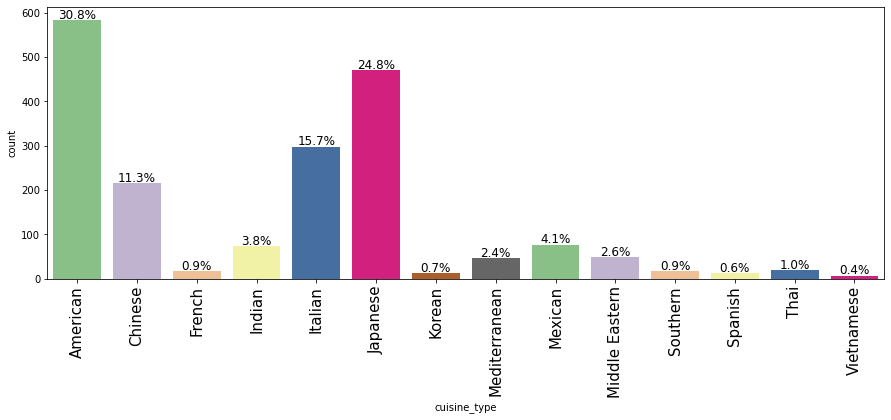

In [18]:
#Visualizing percentage of cuisine type in orders
labeled_barplot(df, 'cuisine_type', perc=True)

### Observations:
The highest number of orders are from American restaurants followed by Japanese and Italian.

### Cost of the order

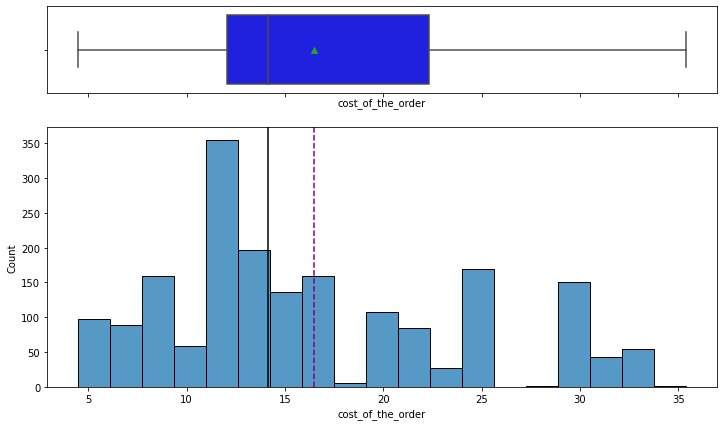

In [19]:
# Visualizing the statistics of cost
histogram_boxplot(df, 'cost_of_the_order')

### Observations:

The cost of the order has a right skewed distribution.
The mean of the cost of the order is around 16.5.

### Day of the week

In [20]:
# Checking the unique values of this column
df['day_of_the_week'].unique()

['Weekend', 'Weekday']
Categories (2, object): ['Weekend', 'Weekday']

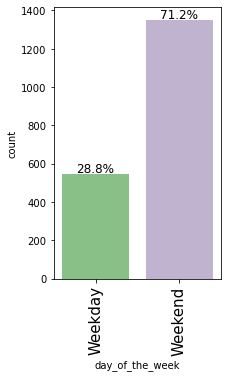

In [21]:
# percentage of orders on weekday and weekends
labeled_barplot(df, 'day_of_the_week', perc=True)

### Observations:
The order on weekends is higher than weekdays.

### Rating

In [22]:
# Checking the unique values of ratings
df['rating'].unique() 

array(['Not given', '5', '3', '4'], dtype=object)

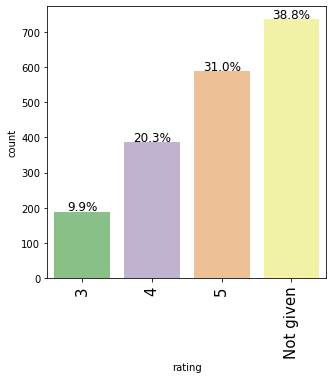

In [23]:
# percentage of different ratings given to orders
labeled_barplot(df, 'rating', perc=True)

### Food Preparation time

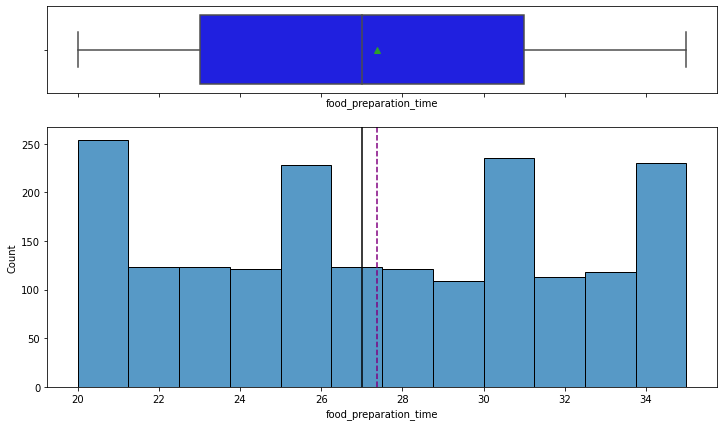

In [24]:
# Visualizing food preparation time
histogram_boxplot(df, 'food_preparation_time')

### Observations:
Mean of food preparation time is around 27 minutes.

### Delivery time

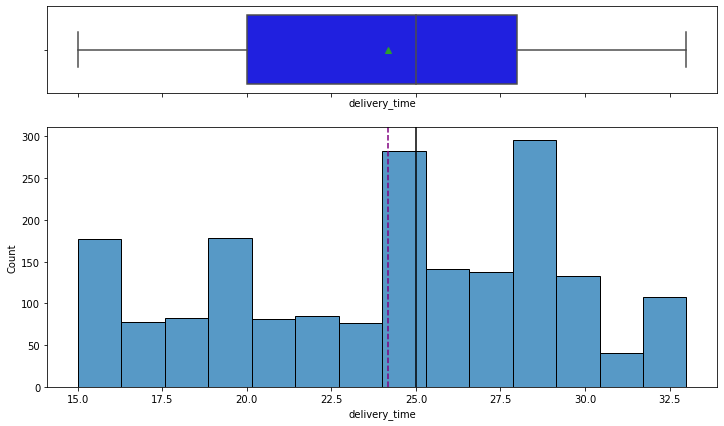

In [25]:
# Visualizing delivery time
histogram_boxplot(df,'delivery_time')

### Observations:
Mean of delivery time is around 24 minutes.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [26]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants with highest number of orders.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [27]:
df_pop_weekend = df[df['day_of_the_week'] == 'Weekend']
df_pop_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine is the most popular cuisine on weekends.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [28]:
# Orders that cos0t above 20 dollars
df_above_20 = df[df['cost_of_the_order']>20].shape[0] 
print(df_above_20)

# Percentage of such orders in the dataset
percentage = (df_above_20 / df.shape[0]) * 100
print(round(percentage,2))

555
29.24


#### Observations:
1. The number of total orders that cost above 20 dollars is: 555.
2. Percentage of orders above 20 dollars is 29.24 %

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [29]:
#Mean delivery time
mean_del_time = df['delivery_time'].mean()
print(round(mean_del_time))

24


#### Observations:
The mean delivery time for this dataset is 24 minutes.


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [30]:
df.sort_values('cost_of_the_order', ascending = False).head(1)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
The customer ID 62359 will be given a free coupon of 15 dollars.

### Bivariate Analysis

### Question 12: Perform bivariate analysis to explore relationships between the important variables in the dataset. (7 marks)


### Day of the Week vs Delivery time

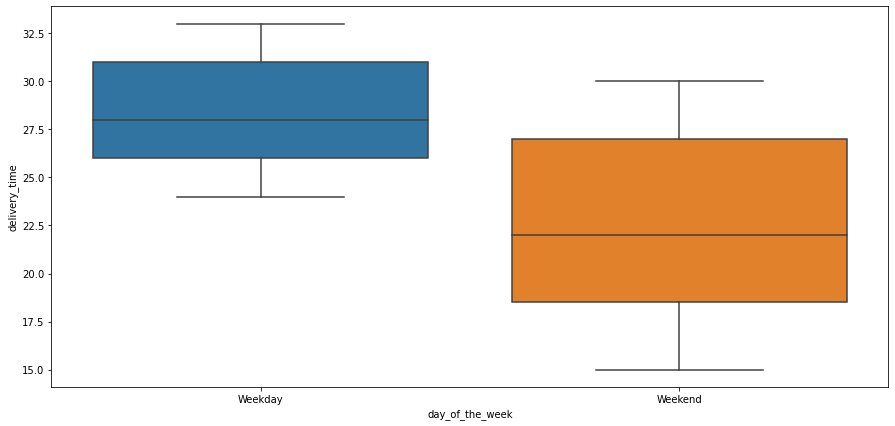

In [31]:
# Bivariate analysis of day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.show()

#### Observations:
The delivery time is lesser on weekends.

### Cuisine vs Cost of the order

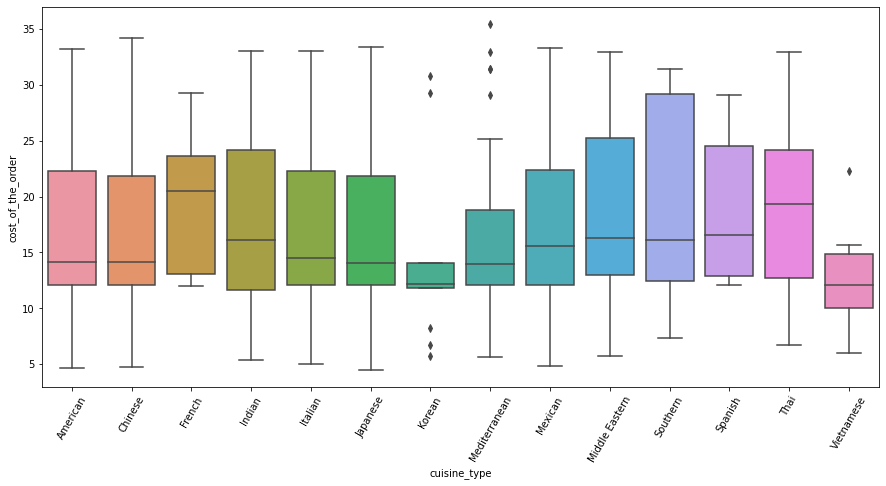

In [32]:
# Bivariate analysis of cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

### Observations:
We see that the cost of the order of Korean cuisine has outliers on both sides.
The Mediterranean and Vietnamese also has some outliers.

### Cuisine vs Food Preparation time

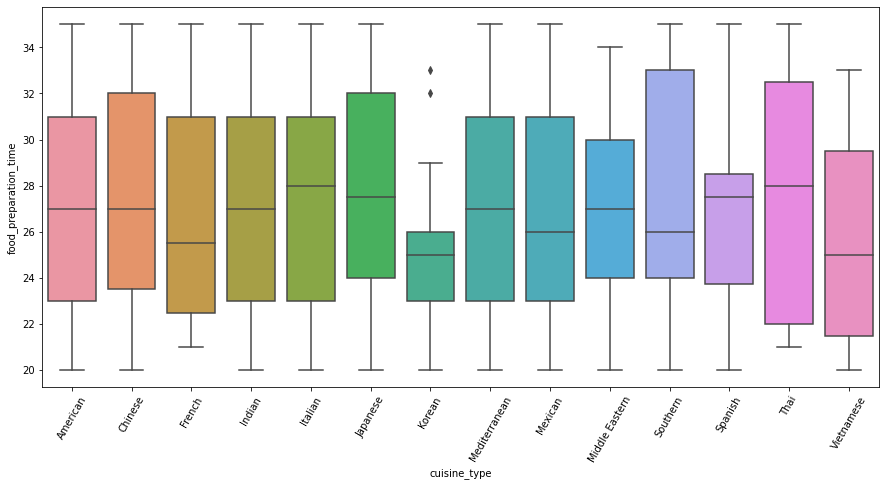

In [33]:
# Bivariate analysis of food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df) 
plt.xticks(rotation = 60)
plt.show()

### Observation:
Korean food has some outliers.

### Rating vs Cost of the order

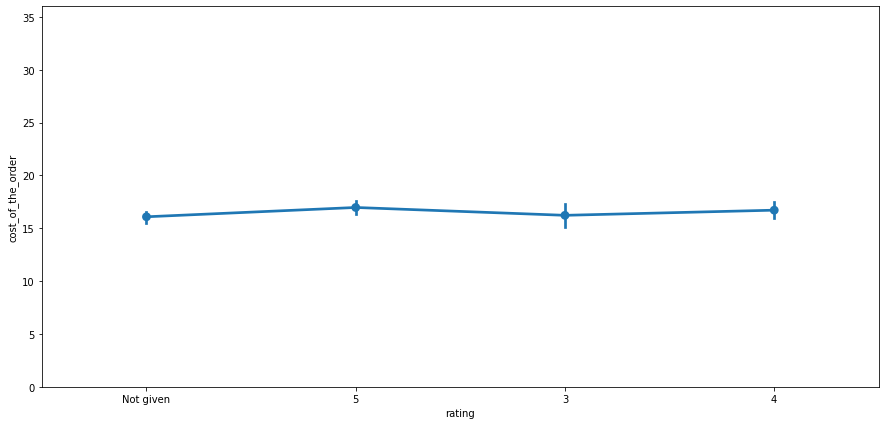

In [34]:
# Bivariate analysis of rating and cost of the order using pointplot
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)  
plt.ylim(0, 36)
plt.show()

#### Observation: 
There is hardly any correlation between the variables.

### Rating vs Delivery time

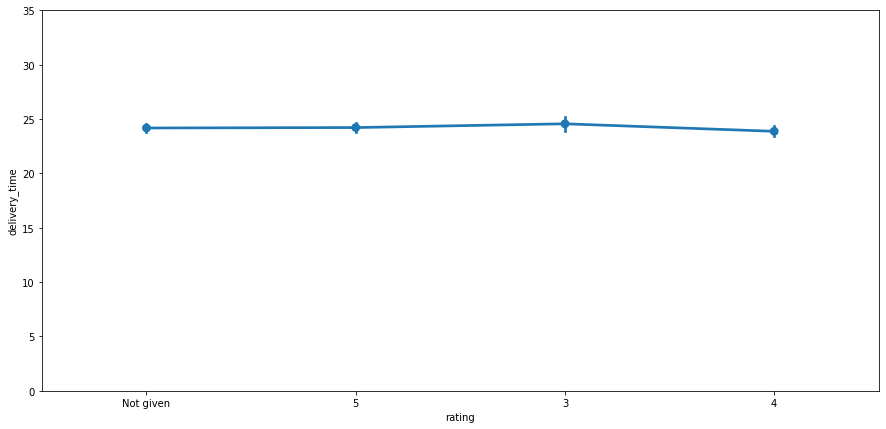

In [35]:
# Bivariate analysis of rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.ylim(0, 35)
plt.show()

### Observation:
There is hardly any correlation between the variables.


### Rating vs Food preparation time

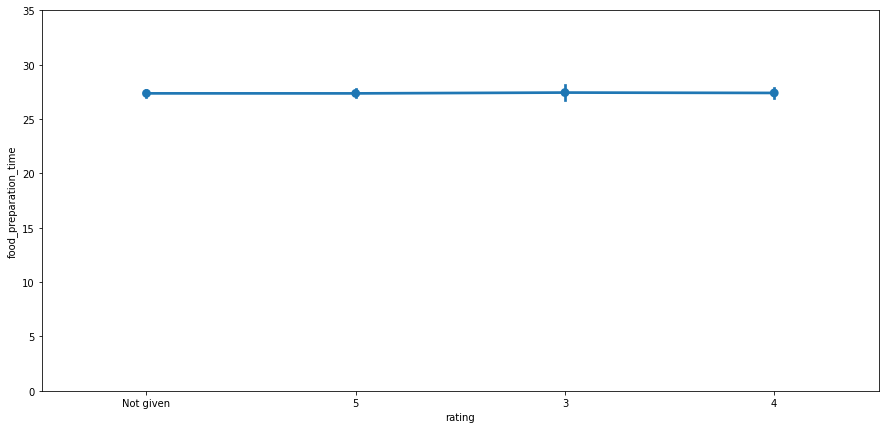

In [36]:
# Bivariate analysis of rating and food preparation time using pointplot
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.ylim(0, 35)
plt.show()

### Observation:
There is hardly any correlation between the variables.

### Correlation of the variables

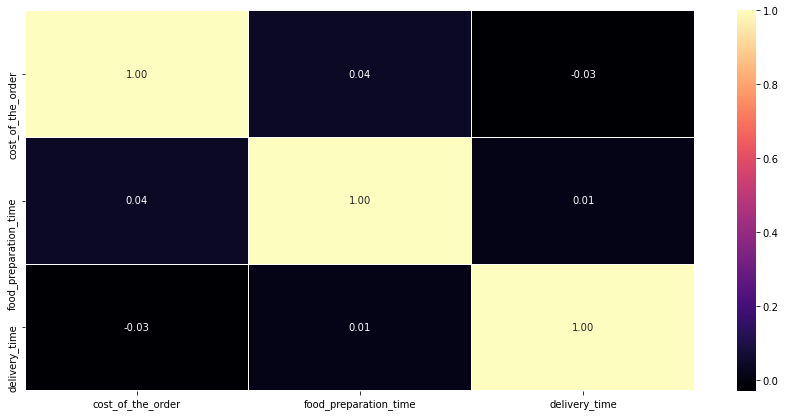

In [37]:
# Plotting the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### Observation:
There is hardly any correlation between the variables.


### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [38]:
# Filtering out 'Not given' ratings
df_only_rated = df[df['rating'] != 'Not given'].copy()

# Getting each restaurant ratings count
rating_count = df_only_rated.groupby(['restaurant_name'])['rating'].count().reset_index()
# Restaurants more than 50 ratings
rating_50 = rating_count[rating_count['rating']>50]['restaurant_name']

# Filtering data to find restaurants that have rating more than 50
df_50 = df_only_rated[df_only_rated['restaurant_name'].isin(rating_50)].copy()

# Converting rating from object to integer
df_50['rating'] = df_50['rating'].astype('int')
# now get average rating of each restaurant 
rest_ratings = df_50.groupby(['restaurant_name'])['rating'].mean().reset_index().dropna()

# Restaurants with rating > 4
rest_ratings[rest_ratings['rating'] > 4]

,restaurant_name,rating
20,Blue Ribbon Fried Chicken,4.328125
21,Blue Ribbon Sushi,4.219178
136,Shake Shack,4.278195
153,The Meatball Shop,4.511905


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken will get promotional offer.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [39]:
#calculating the revenue for orders above $20
rev_20_plus = df[(df['cost_of_the_order'] > 20)]['cost_of_the_order'].sum()*0.25

#calculating the revenue for orders between $5 - $20
rev_5_to_20 = df[((df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20))]['cost_of_the_order'].sum()*0.15

#calculating total revenue
tot_rev = (rev_20_plus + rev_5_to_20)
round(tot_rev)

6166

#### Observations:
The net revenue generated on all the orders is $6166.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [40]:
#creating new column to find the sum of food preparation time and delivery time
df['tot_time'] = df['food_preparation_time'] + df['delivery_time']
num_del_60 = df[df['tot_time']>60].shape[0] #orders that take more than 60 minutes delivery time

#calculating percentage of orders that take more than 60 minutes of total delivery time
per_of_orders = num_del_60/df.shape[0] * 100
round(per_of_orders,2)

10.54

#### Observations:
Percentage of orders that have more than 60 minutes of delivery time: 10.54 %


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [41]:
df.groupby('day_of_the_week').delivery_time.mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time on weekdays is more than on weekends.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)


### Conclusion

We analyzed a dataset of a food aggregator company FoodHub which offers access to multiple restaurants through a single smartphone app. A data of 1200 customers ordering food delivery from 178 restaurants in New York with a total of 1898 orders on both weekdays and weekends was analysed. The main feature of interest here is the demand and supply of food from different restaurants. Here are the conclusions and business recommendations derived from the analysis. 

We have been able to conclude that:
1. American cuisine is the most popular cuisine in New York.
2. The number of orders is higher on weekends as compared to weekdays.
3. There are 38.8% orders that have not been rated which indicates a high percent of customers not giving ratings at all, making    it difficult to analyse the user experience of this group of customers.
4. Around 10% orders are rated 3.
5. Around 50% orders are rated 4 and 5 in total, indicating half of the customers seem to be satisfied with the experience ordering food through Foodhub.
6. Around 10% of orders take more than 60 minutes to deliver food.
7. 'Time of the day' data is missing, which could have helped further to get more insights.
8. Delivery time is lesser on weekends.

### Recommendation to business:

1. American restaurants are a great business for Foodhub followed by Japanese, Italian and Chinese. 
2. Enough Foodhub delivery persons must be ensured during weekends to cater to high demand.
3. Procure data for the delivery person's availability to get a better understanding of the demand-supply status and build a        machine learning model to accurately predict deliveries per hour, to optimize them in respective areas.
4. More incentives/discounts necessary on weekdays to increase the number of orders.
5. As high number of orders are not rated, customers need to be encouraged with incentives to give ratings. 
6. Customers who haven't given any ratings must be analysed more to see what could be the reason behind not giving ratings.

